# 📌 Transform: Primeiro Tratar

[Clique para acessar os dados](https://docs.google.com/spreadsheets/d/1YQhDNSt1sOrzq6AKxyYG6wzRAvM-M7l7jJRIHunNB88/copy?gid=1190375422#gid=1190375422)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_receitas = pd.read_csv('/content/Cópia de Dados - TCC - Planilhas - Receitas.csv')

## 2️⃣ Ao nível de linhas

### 💡 Substituir linhas

Em planilhas, a alteração é com mouse, basta clicar (low-code, lembra da nossa aula de ferramentas?) Aqui é com o teclado high-code)!

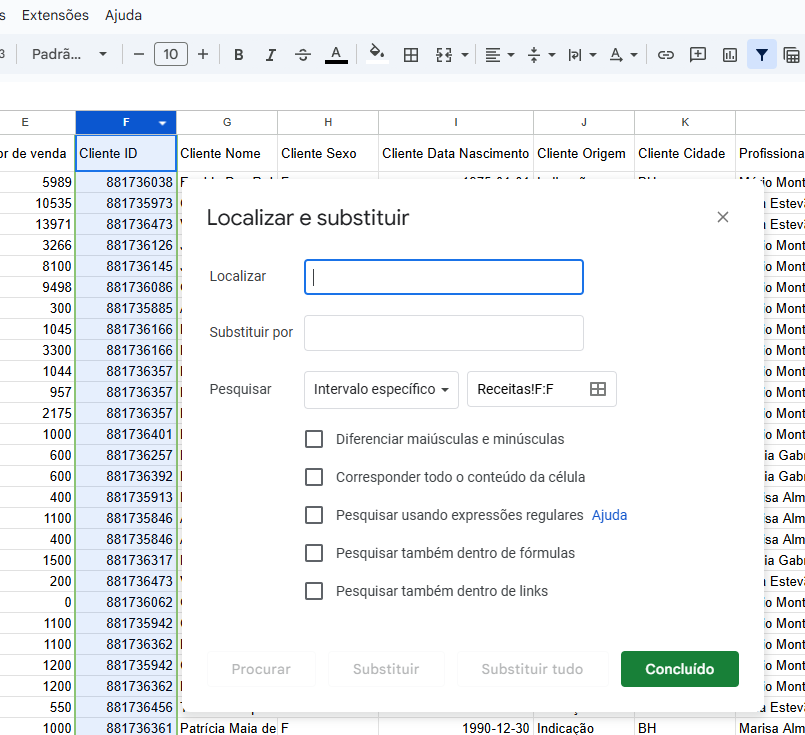

🔹 Com value_counts() podemos ver que a coluna Sexo está com os valores meio estranhos, veja só

In [ ]:
df_receitas['cliente_sexo'].value_counts(dropna=False)

,count
cliente_sexo,
F,536
Feminino,408
NaN,192
M,92
Masculino,14


🔹 Você pode usar a função np.where() para substituir onde tem F por Feminino. É uma boa escolha de função quando queremos substituir valores com base em uma única condição

In [ ]:
df_receitas["cliente_sexo"].value_counts()

,count
cliente_sexo,
F,536
Feminino,408
M,92
Masculino,14


In [ ]:
df_receitas["cliente_sexo"] = np.where(df_receitas["cliente_sexo"] == 'F', "Feminino", df_receitas["cliente_sexo"])

🔹 No entanto, aqui precisamos substituir dois valores, porque também M precisa ser substituído por Masculino. Nesse caso, é possível utilizar np.select()

In [ ]:
# Definir condições
condicoes = [df_receitas["cliente_sexo"] == "F",
             df_receitas["cliente_sexo"] == "M"
             ]

# Definir os valores correspondentes para cada condição. Tem que ter um valor para cada condição
valores = ["Feminino", "Masculino"]

# Aplicar a substituição com np.select() com um valor default
df_receitas["cliente_sexo"] = np.select(condicoes, valores, default= df_receitas["cliente_sexo"])


🔹 Só que em programação, existem vários caminhos! Você ainda pode utilizar funções como replace()

In [ ]:
# Substituir diretamente valores específicos

df_receitas["cliente_sexo"] = df_receitas["cliente_sexo"].replace({"F": "Feminino", "M": "Masculino"})


🔹 Ou a função map(). Só tome o cuidado, pois se um valor não estiver no dicionário, ele será convertido para NaN.

In [ ]:
# Criar um dicionário de mapeamento e aplicar com map().

mapa_sexo = {"F": "Feminino", "M": "Masculino", "Feminino": "Feminino", "Masculino": "Masculino"}

df_receitas["cliente_sexo"] = df_receitas["cliente_sexo"].map(mapa_sexo)

🔹 Por fim, utilize a função apply(), para aplicar uma função customizada por você!

In [ ]:
# Função personalizada para padronizar a coluna

def padronizar_sexo(valor):
    if valor in ["F", "Feminino"]:
        return "Feminino"
    elif valor in ["M", "Masculino"]:
        return "Masculino"
    return valor #retorna o valor original caso não seja alterado

# Aplicando a função com apply()
df_receitas["cliente_sexo"] = df_receitas["cliente_sexo"].apply(padronizar_sexo)


### 💡 Imputar linhas

🔹 A gente poderia ter utilizado a substituição para substituir um valor nulo (NaN).

In [ ]:
# Substituir valores nulos por "Não informado"

df_receitas["cliente_sexo"] = np.where(df_receitas["cliente_sexo"].isna(), "Não informado", df_receitas["cliente_sexo"])

🔹 Mas também existe uma função específica para substituição de Nulos

In [ ]:
# Preenchendo nulos com a moda (valor mais frequente) da coluna

df_receitas["cliente_sexo"] = df_receitas["cliente_sexo"].fillna("Não informado")

🔹 A função fillna tem vários parâmetros interessantes, veja a documentação

[Clique para ver a documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)